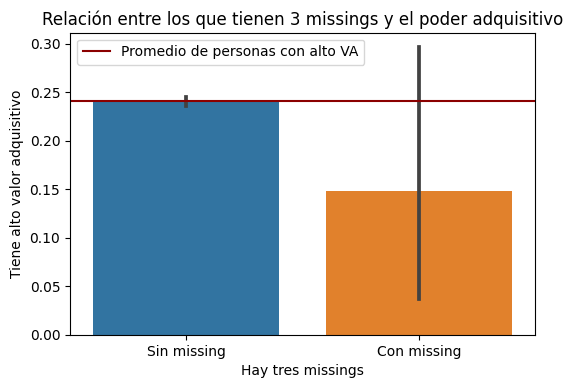

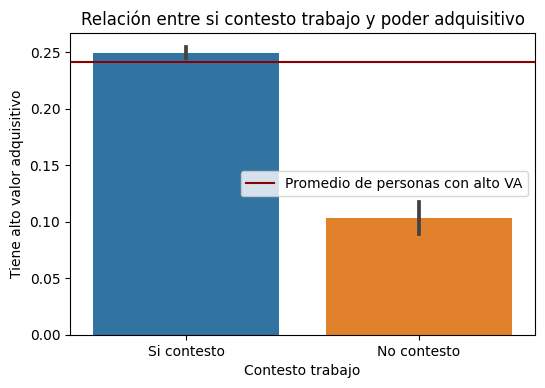

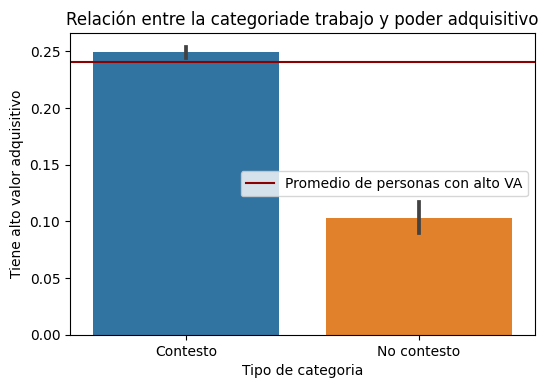

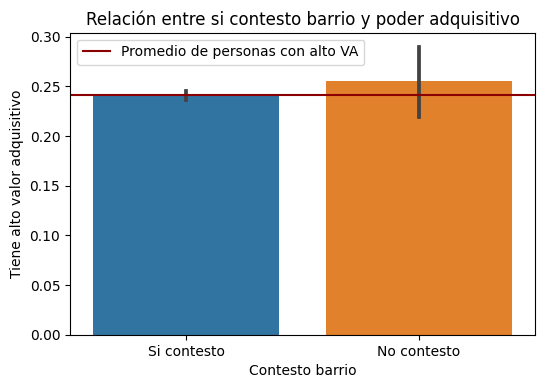

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### Ganancia

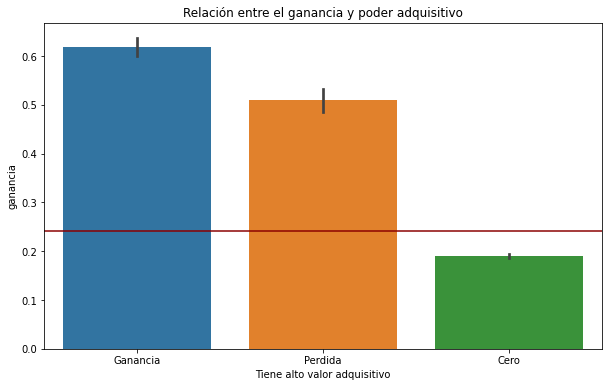

In [2]:
def categorizar_ganancia(ganancia):
    if ganancia == 0:
        return 'Cero'
    elif ganancia < 0:
        return 'Perdida'
    else:
        return 'Ganancia'

df_ganancia = df[['ganancia_perdida_declarada_bolsa_argentina','tiene_alto_valor_adquisitivo']].copy()
df_ganancia['ganancia'] = df_ganancia['ganancia_perdida_declarada_bolsa_argentina'].apply(categorizar_ganancia)
df_ganancia['ganancia'].value_counts()

#BARPLOT
plt.figure(figsize=(10, 6))
indices = df_ganancia.groupby('ganancia')['tiene_alto_valor_adquisitivo'].aggregate(lambda x: np.mean(x))

ax = sns.barplot(
    data=df_ganancia,
    x='ganancia',
    y='tiene_alto_valor_adquisitivo',
    order= indices.sort_values(ascending=False).index)

plt.ylabel("ganancia")
plt.xlabel("Tiene alto valor adquisitivo")
plt.title('Relación entre el ganancia y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

Cero        28301
Invierte     4226
Name: ganancia, dtype: int64


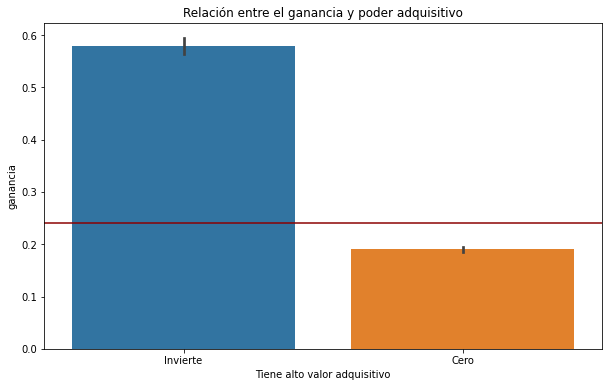

In [3]:
def categorizar_ganancia(ganancia):
    if ganancia == 0:
        return 'Cero'
    else:
        return 'Invierte'

df_ganancia = df[['ganancia_perdida_declarada_bolsa_argentina','tiene_alto_valor_adquisitivo']].copy()
df_ganancia['ganancia'] = df_ganancia['ganancia_perdida_declarada_bolsa_argentina'].apply(categorizar_ganancia)
print(df_ganancia['ganancia'].value_counts())

#BARPLOT
plt.figure(figsize=(10, 6))
indices = df_ganancia.groupby('ganancia')['tiene_alto_valor_adquisitivo'].aggregate(lambda x: np.mean(x))

ax = sns.barplot(
    data=df_ganancia,
    x='ganancia',
    y='tiene_alto_valor_adquisitivo',
    order= indices.sort_values(ascending=False).index)

plt.ylabel("ganancia")
plt.xlabel("Tiene alto valor adquisitivo")
plt.title('Relación entre el ganancia y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

In [4]:
df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts()

1    2449
0    1777
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [5]:
df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts().tolist()[0]/df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts().sum()

0.5795078088026503

In [6]:
df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts().tolist()[0]/32527

0.0752912964614013

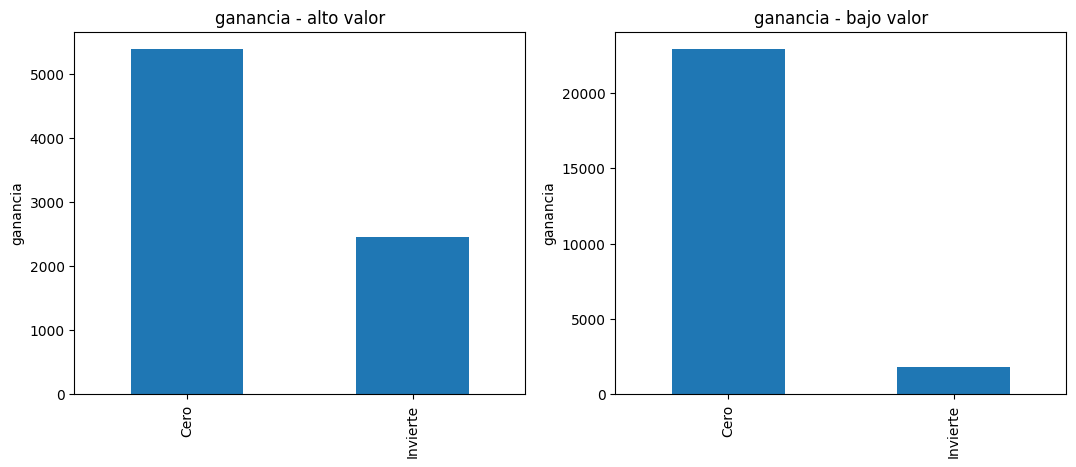

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df_ganancia[df_ganancia['tiene_alto_valor_adquisitivo'] == 1]
df_bajo_valor = df_ganancia[df_ganancia['tiene_alto_valor_adquisitivo'] != 1]

df_alto_valor.ganancia.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("ganancia - alto valor")
axes[0].set_ylabel("ganancia")

df_bajo_valor.ganancia.value_counts().plot(kind='bar', ax=axes[1],)
axes[1].set_title("ganancia - bajo valor")
axes[1].set_ylabel("ganancia")

plt.show()

In [19]:
total_alto_valor = df_alto_valor['ganancia'].value_counts().sum()
total_buenos_trabajos = df_alto_valor[df_alto_valor['ganancia'] == 'Invierte'].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

31.249202500956997

In [18]:
total_alto_valor = df_ganancia['ganancia'].value_counts().sum()
total_buenos_trabajos = df_ganancia[df_ganancia['ganancia'] == 'Invierte'].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

12.992283333845728